In [1]:
import numpy as np;import pandas as pd
housing=pd.read_csv(r'C:\Users\SONY\Desktop\NumPy\housing.data.txt',names=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS',
                                                                       'RAD','TAX','PTRAIO','B','LSTAT','MEDV'],sep='\s+')
housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRAIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


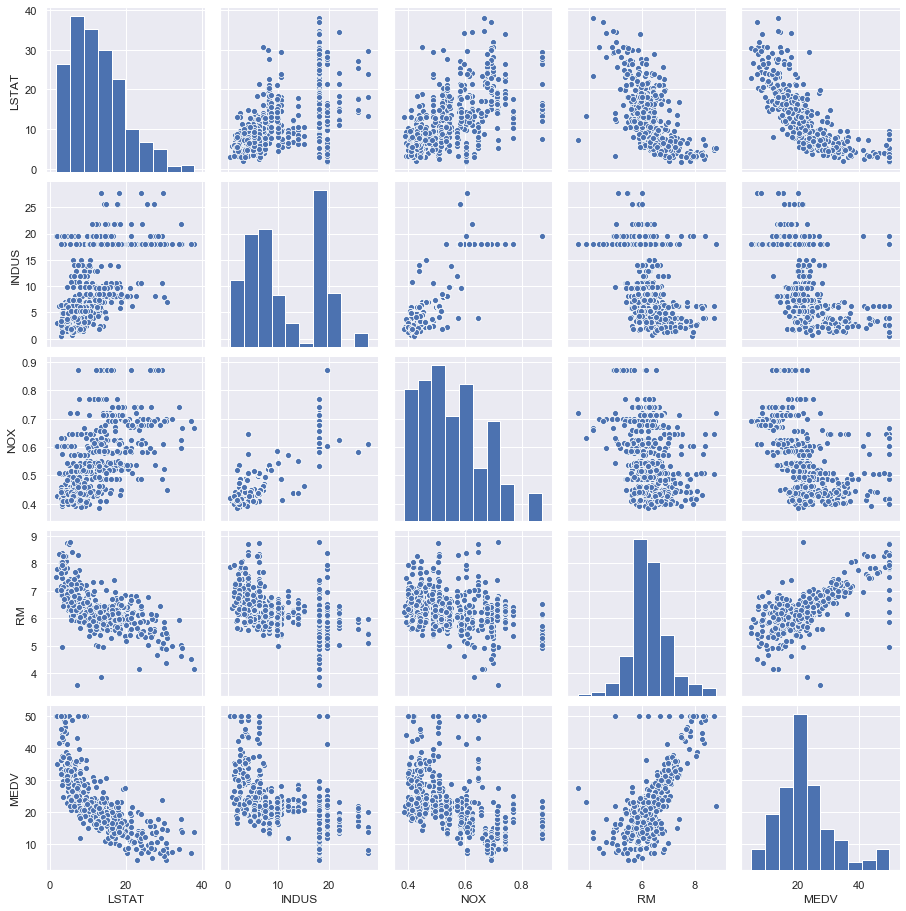

In [2]:
import seaborn as sns;sns.set()

sns.pairplot(housing[['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']])

In [3]:
import numpy as np
matriz_correlacion=np.corrcoef(housing[['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']].values,rowvar=False)


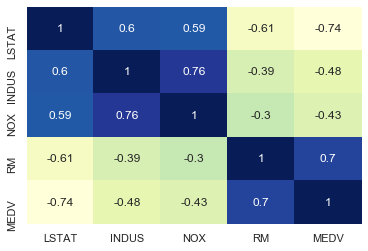

In [4]:
import matplotlib.pyplot as plt
sns.heatmap(matriz_correlacion,annot=True,cbar=False,cmap='YlGnBu',xticklabels=['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV'],
           yticklabels=['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV'])


In [5]:
from sklearn.preprocessing import StandardScaler

X=housing['RM'].values[:,np.newaxis]
y=housing['MEDV'].values[:,np.newaxis]
xx=StandardScaler()
yy=StandardScaler()
X_std=xx.fit_transform(X)
y_std=yy.fit_transform(y)


Text(0, 0.5, 'Precio de las viviendas [En miles de Dolares]')

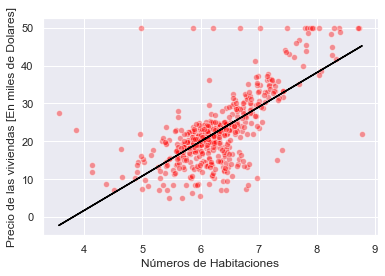

In [7]:
from sklearn.linear_model import LinearRegression
def reg_plotter(X,y,modelo):
    plt.scatter(xx.inverse_transform(X),yy.inverse_transform(y),alpha=0.4,c='red',edgecolors='white')
    plt.plot(xx.inverse_transform(X),yy.inverse_transform(modelo.predict(X)),c='black')

modelo=LinearRegression().fit(X_std,y_std)

reg_plotter(X_std,y_std,modelo)

plt.xlabel('Números de Habitaciones');plt.ylabel('Precio de las viviendas [En miles de Dolares]')

###### En general se observa una tendencia al alza en el precio de la viviendas cuando el número de habitaciones también aumenta. Sin embargo no es una relación causal, ya que claramente algunos precios de viviendas no se pueden explicar sólo por el número de habitaciones que estas poseen. Se deben tener en cuenta otros factores como la geografía del lugar, exclusividad, burbujas inmobiliarias etc.